In [1]:
import sys
import os
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from utils import *
import resnet50
import pandas as pd
import numpy as np
from glob import glob
from keras.layers import Dense, Conv2D, BatchNormalization, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import log_loss
%matplotlib inline
cwd = os.getcwd()
input_dir  = os.path.join(os.path.dirname(cwd), 'data', 'crops_for_rot', 'wrap')
batch_size=32
num_class = 447
img_shape=(3, 300, 300)
target_size = (300,300)

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


In [2]:
def get_tr_batches(dr = input_dir+ '/train', gen = ImageDataGenerator(), batch_size=batch_size):
    return gen.flow_from_directory(dr, shuffle=True, target_size=target_size, batch_size=batch_size)

def get_val_batches(dr = input_dir+ '/valid', gen = ImageDataGenerator(), batch_size=batch_size):
    return gen.flow_from_directory(dr, shuffle=False, target_size=target_size, batch_size=batch_size)


def get_test_batches(dr = input_dir+ '/test', gen = ImageDataGenerator(), batch_size=batch_size):
    return gen.flow_from_directory(dr, shuffle=False, target_size=target_size, batch_size=batch_size)


# Load Data

In [31]:
tr_data = load_array('tr_rot_224_conv_feats.bc')
val_data = load_array('val_rot_224_conv_feats.bc')

In [63]:
tr_data.shape

(3864, 512, 7, 7)

In [64]:
val_data.shape

(680, 512, 7, 7)

In [32]:
tr_b = ImageDataGenerator().flow_from_directory(input_dir+'/train', shuffle=False, batch_size=1)
tr_c = tr_b.classes

Found 3864 images belonging to 447 classes.


In [33]:
val_b = ImageDataGenerator().flow_from_directory(input_dir+'/valid', shuffle=False, batch_size=1)


Found 680 images belonging to 447 classes.


In [59]:
im = val_b.next()

In [34]:
val_b = ImageDataGenerator().flow_from_directory(input_dir+'/valid', shuffle=False, batch_size=1)
val_c = val_b.classes

Found 680 images belonging to 447 classes.


In [35]:
val_c.shape

(680,)

# Only Conv

In [73]:
def getm():
    return Sequential([
            ZeroPadding2D(input_shape=(512, 7,7)),
            Convolution2D(512, 3,3, activation='relu'),
            ZeroPadding2D(),
            Convolution2D(512, 3,3, activation='relu'),
            ZeroPadding2D(),
            Convolution2D(512, 3,3, activation='relu'),
            ZeroPadding2D(),
            Convolution2D(512, 3,3, activation='relu'),
            ZeroPadding2D(),
            Convolution2D(num_class, 3,3, activation='relu'),
            GlobalAveragePooling2D(),
            Activation('softmax')
        ])

In [74]:
m = getm()

th


In [75]:
m.compile(Adam(lr=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [76]:
m.fit(tr_data, tr_c, validation_data=(val_data, val_c), shuffle=True, nb_epoch=50)

Train on 3864 samples, validate on 680 samples
Epoch 1/50
3864/3864 [==============================] - 14s - loss: 6.0759 - acc: 0.0049 - val_loss: 6.0106 - val_acc: 0.0103
Epoch 2/50
3864/3864 [==============================] - 14s - loss: 5.9821 - acc: 0.0116 - val_loss: 5.9750 - val_acc: 0.0132
Epoch 3/50
3864/3864 [==============================] - 14s - loss: 5.9113 - acc: 0.0184 - val_loss: 5.9329 - val_acc: 0.0147
Epoch 4/50
3864/3864 [==============================] - 14s - loss: 5.8269 - acc: 0.0230 - val_loss: 5.8996 - val_acc: 0.0088
Epoch 5/50
3864/3864 [==============================] - 14s - loss: 5.7116 - acc: 0.0404 - val_loss: 5.8616 - val_acc: 0.0221
Epoch 6/50
3864/3864 [==============================] - 14s - loss: 5.5530 - acc: 0.0616 - val_loss: 5.8291 - val_acc: 0.0368
Epoch 7/50
3864/3864 [==============================] - 14s - loss: 5.3688 - acc: 0.0826 - val_loss: 5.7785 - val_acc: 0.0265
Epoch 8/50
3864/3864 [==============================] - 14s - loss: 5.1

KeyboardInterrupt: 

In [ ]:
m.save_w

# Fit Model

In [90]:
from keras import regularizers

In [93]:
Dense?

In [107]:
def getlm():
    return Sequential([
            Flatten(input_shape=(512, 7, 7)),
            BatchNormalization(),
            Dense(256, activation='relu', W_regularizer=regularizers.l2(0.01)),
            Dropout(0.8),
            Dense(num_class, activation='softmax', W_regularizer=regularizers.l2(0.01))
        ])

In [108]:
model = getlm()

In [109]:
model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [110]:
model.fit(tr_data, tr_c, validation_data=(val_data, val_c), shuffle=True, nb_epoch=50)

Train on 3864 samples, validate on 680 samples
Epoch 1/50
3864/3864 [==============================] - 3s - loss: 15.3095 - acc: 0.0065 - val_loss: 6.5460 - val_acc: 0.0074
Epoch 2/50
3864/3864 [==============================] - 3s - loss: 11.5202 - acc: 0.0347 - val_loss: 6.0157 - val_acc: 0.0265
Epoch 3/50
3864/3864 [==============================] - 3s - loss: 10.0063 - acc: 0.0479 - val_loss: 5.9308 - val_acc: 0.0338
Epoch 4/50
3864/3864 [==============================] - 3s - loss: 9.4939 - acc: 0.0549 - val_loss: 5.8935 - val_acc: 0.0353
Epoch 5/50
3864/3864 [==============================] - 3s - loss: 9.4008 - acc: 0.0678 - val_loss: 5.8765 - val_acc: 0.0397
Epoch 6/50
3864/3864 [==============================] - 3s - loss: 9.4528 - acc: 0.0740 - val_loss: 5.8277 - val_acc: 0.0324
Epoch 7/50
3864/3864 [==============================] - 3s - loss: 9.4729 - acc: 0.0769 - val_loss: 5.8441 - val_acc: 0.0426
Epoch 8/50
3864/3864 [==============================] - 3s - loss: 9.4925 -

In [111]:
model.save_weights('rot_224_inf_5.56_.h5')

In [112]:
model.optimizer.lr = 0.0001

In [113]:
model.fit(tr_data, tr_c, validation_data=(val_data, val_c), shuffle=True, nb_epoch=25)

Train on 3864 samples, validate on 680 samples
Epoch 1/25
3864/3864 [==============================] - 3s - loss: 10.0970 - acc: 0.1392 - val_loss: 5.5522 - val_acc: 0.0544
Epoch 2/25
3864/3864 [==============================] - 3s - loss: 10.0526 - acc: 0.1475 - val_loss: 5.5197 - val_acc: 0.0691
Epoch 3/25
3864/3864 [==============================] - 3s - loss: 10.0645 - acc: 0.1361 - val_loss: 5.5300 - val_acc: 0.0529
Epoch 4/25
3864/3864 [==============================] - 3s - loss: 10.0095 - acc: 0.1408 - val_loss: 5.5644 - val_acc: 0.0559
Epoch 5/25
3864/3864 [==============================] - 3s - loss: 9.9950 - acc: 0.1532 - val_loss: 5.5123 - val_acc: 0.0603
Epoch 6/25
3864/3864 [==============================] - 3s - loss: 9.9506 - acc: 0.1612 - val_loss: 5.5902 - val_acc: 0.0529
Epoch 7/25
3864/3864 [==============================] - 3s - loss: 9.9385 - acc: 0.1630 - val_loss: 5.5796 - val_acc: 0.0529
Epoch 8/25
3864/3864 [==============================] - 3s - loss: 9.9646 

In [114]:
model.save_weights('rot_inf_224_5.51.h5')

In [119]:
def getlm():
    return Sequential([
            Flatten(input_shape=(512, 7, 7)),
            BatchNormalization(),
            Dense(256, activation='relu', W_regularizer=regularizers.l2(0.01)),
            Dropout(0.3),
            BatchNormalization(),
            Dense(256, activation='relu', W_regularizer=regularizers.l2(0.01)),
            Dropout(0.3),
            BatchNormalization(),
            Dense(num_class, activation='softmax', W_regularizer=regularizers.l2(0.01))
        ])

In [120]:
model = getlm()

In [121]:
model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [122]:
model.fit(tr_data, tr_c, validation_data=(val_data, val_c), shuffle=True, nb_epoch=50)

Train on 3864 samples, validate on 680 samples
Epoch 1/50
3864/3864 [==============================] - 3s - loss: 14.0246 - acc: 0.0083 - val_loss: 6.0058 - val_acc: 0.0206
Epoch 2/50
3864/3864 [==============================] - 3s - loss: 10.0542 - acc: 0.0813 - val_loss: 5.8543 - val_acc: 0.0397
Epoch 3/50
3864/3864 [==============================] - 3s - loss: 9.0078 - acc: 0.1240 - val_loss: 5.7508 - val_acc: 0.0397
Epoch 4/50
3864/3864 [==============================] - 3s - loss: 8.6868 - acc: 0.1576 - val_loss: 5.6984 - val_acc: 0.0500
Epoch 5/50
3864/3864 [==============================] - 3s - loss: 8.5796 - acc: 0.1946 - val_loss: 5.6169 - val_acc: 0.0574
Epoch 6/50
3864/3864 [==============================] - 3s - loss: 8.6170 - acc: 0.2187 - val_loss: 5.6742 - val_acc: 0.0397
Epoch 7/50
3864/3864 [==============================] - 3s - loss: 8.7866 - acc: 0.2226 - val_loss: 5.6656 - val_acc: 0.0515
Epoch 8/50
3864/3864 [==============================] - 3s - loss: 8.8946 - 

KeyboardInterrupt: 

In [97]:
model.save_weights('rot_inf_574.59_.h5')

In [98]:
model.fit(tr_data, tr_c, validation_data=(val_data, val_c), shuffle=True, nb_epoch=50)

Train on 3864 samples, validate on 680 samples
Epoch 1/50
3864/3864 [==============================] - 8s - loss: 5.2755 - acc: 0.0432 - val_loss: 5.7442 - val_acc: 0.0338
Epoch 2/50
3864/3864 [==============================] - 8s - loss: 5.2516 - acc: 0.0375 - val_loss: 5.7386 - val_acc: 0.0353
Epoch 3/50
3864/3864 [==============================] - 8s - loss: 5.2271 - acc: 0.0435 - val_loss: 5.7403 - val_acc: 0.0368
Epoch 4/50
3864/3864 [==============================] - 8s - loss: 5.1921 - acc: 0.0432 - val_loss: 5.7427 - val_acc: 0.0382
Epoch 5/50
3864/3864 [==============================] - 8s - loss: 5.1977 - acc: 0.0533 - val_loss: 5.7410 - val_acc: 0.0353
Epoch 6/50
3864/3864 [==============================] - 8s - loss: 5.1898 - acc: 0.0489 - val_loss: 5.7488 - val_acc: 0.0382
Epoch 7/50
3864/3864 [==============================] - 8s - loss: 5.2048 - acc: 0.0523 - val_loss: 5.7500 - val_acc: 0.0368
Epoch 8/50
3864/3864 [==============================] - 8s - loss: 5.1520 - ac

KeyboardInterrupt: 

# Less Dropout

In [70]:
def getlm():
    return Sequential([
            Flatten(input_shape=(512,7, 7)),
            BatchNormalization(),
            Dense(512, activation='relu'),
            Dropout(0.5),
            BatchNormalization(),
            Dense(num_class, activation='softmax')
        ])

In [71]:
model = getlm()

In [72]:
model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [73]:
model.fit(tr_data, tr_c, validation_data=(val_data, val_c), shuffle=True, nb_epoch=3)

Train on 3864 samples, validate on 680 samples
Epoch 1/3
3864/3864 [==============================] - 2s - loss: 6.2979 - acc: 0.0119 - val_loss: 6.1306 - val_acc: 0.0529
Epoch 2/3
3864/3864 [==============================] - 2s - loss: 3.2587 - acc: 0.5109 - val_loss: 5.5442 - val_acc: 0.0750
Epoch 3/3
3864/3864 [==============================] - 2s - loss: 1.2961 - acc: 0.9239 - val_loss: 5.4952 - val_acc: 0.0912


In [74]:
model.fit(tr_data, tr_c, validation_data=(val_data, val_c), shuffle=True, nb_epoch=3)

Train on 3864 samples, validate on 680 samples
Epoch 1/3
3864/3864 [==============================] - 2s - loss: 0.4227 - acc: 0.9920 - val_loss: 5.4595 - val_acc: 0.0897
Epoch 2/3
3864/3864 [==============================] - 2s - loss: 0.1688 - acc: 0.9997 - val_loss: 5.4620 - val_acc: 0.0971
Epoch 3/3
3864/3864 [==============================] - 2s - loss: 0.0939 - acc: 0.9992 - val_loss: 5.4869 - val_acc: 0.0985


In [75]:
val_preds = model.predict(val_data)

In [77]:
p = pd.DataFrame(val_preds)

In [86]:
p.mean().mean()

0.002237136708572507

In [87]:
p.mean().max()

0.0066279038

In [90]:
p[445]

0      0.002328
1      0.003141
2      0.002117
3      0.005206
4      0.003159
5      0.000863
6      0.002229
7      0.004649
8      0.000243
9      0.001040
10     0.001490
11     0.000403
12     0.004339
13     0.001844
14     0.000420
15     0.002642
16     0.001949
17     0.000699
18     0.000583
19     0.006973
20     0.001369
21     0.002023
22     0.002146
23     0.007780
24     0.000233
25     0.000157
26     0.000781
27     0.001058
28     0.006727
29     0.001818
         ...   
650    0.000911
651    0.000024
652    0.000964
653    0.002096
654    0.000143
655    0.000802
656    0.002441
657    0.013965
658    0.000113
659    0.006140
660    0.006312
661    0.000301
662    0.000354
663    0.002082
664    0.002186
665    0.002295
666    0.007677
667    0.001054
668    0.000934
669    0.009960
670    0.019270
671    0.010409
672    0.001024
673    0.001933
674    0.000080
675    0.000729
676    0.006407
677    0.775328
678    0.024197
679    0.001153
Name: 445, dtype: float3

In [28]:
model.fit(tr_data, tr_c, validation_data=(val_data, val_c), shuffle=True, nb_epoch=3)

Train on 3864 samples, validate on 680 samples
Epoch 1/3
3864/3864 [==============================] - 8s - loss: 0.0373 - acc: 1.0000 - val_loss: 5.5574 - val_acc: 0.0897
Epoch 2/3
3864/3864 [==============================] - 8s - loss: 0.0268 - acc: 1.0000 - val_loss: 5.5854 - val_acc: 0.0941
Epoch 3/3
3864/3864 [==============================] - 8s - loss: 0.0187 - acc: 1.0000 - val_loss: 5.6327 - val_acc: 0.0897


# No Dense

In [29]:
def getlm():
    return Sequential([
            Flatten(input_shape=(512, 15, 15)),
            BatchNormalization(),
            Dense(num_class, activation='softmax')
        ])

In [30]:
model = getlm()

In [31]:
model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
model.fit(tr_data, tr_c, validation_data=(val_data, val_c), shuffle=True, nb_epoch=3)

Train on 3864 samples, validate on 680 samples
Epoch 1/3
3864/3864 [==============================] - 7s - loss: 14.8372 - acc: 0.0153 - val_loss: 15.8958 - val_acc: 0.0059
Epoch 2/3
3864/3864 [==============================] - 7s - loss: 12.9980 - acc: 0.1858 - val_loss: 15.8415 - val_acc: 0.0088
Epoch 3/3
3864/3864 [==============================] - 7s - loss: 12.8202 - acc: 0.2008 - val_loss: 15.6442 - val_acc: 0.0191


In [33]:
model.optimizer.lr = 0.01

In [34]:
model.fit(tr_data, tr_c, validation_data=(val_data, val_c), shuffle=True, nb_epoch=10)

Train on 3864 samples, validate on 680 samples
Epoch 1/10
3864/3864 [==============================] - 7s - loss: 12.7011 - acc: 0.2089 - val_loss: 15.7799 - val_acc: 0.0118
Epoch 2/10
3864/3864 [==============================] - 7s - loss: 12.6668 - acc: 0.2120 - val_loss: 15.8611 - val_acc: 0.0118
Epoch 3/10
3864/3864 [==============================] - 7s - loss: 12.6609 - acc: 0.2101 - val_loss: 15.8561 - val_acc: 0.0147
Epoch 4/10
3864/3864 [==============================] - 7s - loss: 12.6005 - acc: 0.2130 - val_loss: 15.8515 - val_acc: 0.0147
Epoch 5/10
3864/3864 [==============================] - 7s - loss: 12.4894 - acc: 0.2220 - val_loss: 15.8387 - val_acc: 0.0118
Epoch 6/10
3864/3864 [==============================] - 7s - loss: 12.3998 - acc: 0.2280 - val_loss: 15.9348 - val_acc: 0.0103
Epoch 7/10
3864/3864 [==============================] - 7s - loss: 12.3713 - acc: 0.2316 - val_loss: 15.9115 - val_acc: 0.0103
Epoch 8/10
3864/3864 [==============================] - 7s - los

In [35]:
model.optimizer.lr = 0.1

In [36]:
model.fit(tr_data, tr_c, validation_data=(val_data, val_c), shuffle=True, nb_epoch=10)

Train on 3864 samples, validate on 680 samples
Epoch 1/10
3864/3864 [==============================] - 7s - loss: 12.3112 - acc: 0.2342 - val_loss: 15.9383 - val_acc: 0.0088
Epoch 2/10
3864/3864 [==============================] - 7s - loss: 12.2635 - acc: 0.2363 - val_loss: 15.8784 - val_acc: 0.0103
Epoch 3/10
3864/3864 [==============================] - 8s - loss: 12.1883 - acc: 0.2422 - val_loss: 15.7902 - val_acc: 0.0162
Epoch 4/10
3864/3864 [==============================] - 8s - loss: 12.1994 - acc: 0.2415 - val_loss: 15.8546 - val_acc: 0.0132
Epoch 5/10
3864/3864 [==============================] - 8s - loss: 12.2243 - acc: 0.2407 - val_loss: 15.8914 - val_acc: 0.0103
Epoch 6/10
3864/3864 [==============================] - 8s - loss: 12.1311 - acc: 0.2466 - val_loss: 15.8109 - val_acc: 0.0147
Epoch 7/10
3864/3864 [==============================] - 8s - loss: 12.1639 - acc: 0.2435 - val_loss: 15.8091 - val_acc: 0.0162
Epoch 8/10
3864/3864 [==============================] - 8s - los

# FC 128

In [37]:
def getlm():
    return Sequential([
            Flatten(input_shape=(512, 15, 15)),
            BatchNormalization(),
            Dense(128, activation='relu'),
            #Dropout(0.5),
            BatchNormalization(),
            Dense(num_class, activation='softmax')
        ])

In [38]:
model = getlm()

In [39]:
model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
model.fit(tr_data, tr_c, validation_data=(val_data, val_c), shuffle=True, nb_epoch=3)

Train on 3864 samples, validate on 680 samples
Epoch 1/3
3864/3864 [==============================] - 3s - loss: 6.0979 - acc: 0.0184 - val_loss: 6.1390 - val_acc: 0.0353
Epoch 2/3
3864/3864 [==============================] - 3s - loss: 2.5583 - acc: 0.9594 - val_loss: 5.7711 - val_acc: 0.0485
Epoch 3/3
3864/3864 [==============================] - 3s - loss: 0.5685 - acc: 0.9990 - val_loss: 5.7217 - val_acc: 0.0426


In [41]:
model.fit(tr_data, tr_c, validation_data=(val_data, val_c), shuffle=True, nb_epoch=3)

Train on 3864 samples, validate on 680 samples
Epoch 1/3
3864/3864 [==============================] - 4s - loss: 0.0689 - acc: 1.0000 - val_loss: 5.7107 - val_acc: 0.0603
Epoch 2/3
3864/3864 [==============================] - 3s - loss: 0.0267 - acc: 1.0000 - val_loss: 5.7211 - val_acc: 0.0529
Epoch 3/3
3864/3864 [==============================] - 3s - loss: 0.0173 - acc: 1.0000 - val_loss: 5.7415 - val_acc: 0.0559


# FC 32

In [42]:
def getlm():
    return Sequential([
            Flatten(input_shape=(512, 15, 15)),
            BatchNormalization(),
            Dense(32, activation='relu'),
            #Dropout(0.5),
            BatchNormalization(),
            Dense(num_class, activation='softmax')
        ])

In [43]:
model = getlm()

In [44]:
model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [45]:
model.fit(tr_data, tr_c, validation_data=(val_data, val_c), shuffle=True, nb_epoch=3)

Train on 3864 samples, validate on 680 samples
Epoch 1/3
3864/3864 [==============================] - 2s - loss: 6.0960 - acc: 0.0070 - val_loss: 6.1220 - val_acc: 0.0132
Epoch 2/3
3864/3864 [==============================] - 2s - loss: 5.0663 - acc: 0.4174 - val_loss: 6.0388 - val_acc: 0.0176
Epoch 3/3
3864/3864 [==============================] - 2s - loss: 3.8713 - acc: 0.7743 - val_loss: 6.0163 - val_acc: 0.0206


In [46]:
model.fit(tr_data, tr_c, validation_data=(val_data, val_c), shuffle=True, nb_epoch=3)

Train on 3864 samples, validate on 680 samples
Epoch 1/3
3864/3864 [==============================] - 3s - loss: 2.1962 - acc: 0.9180 - val_loss: 5.9737 - val_acc: 0.0147
Epoch 2/3
3864/3864 [==============================] - 3s - loss: 1.1524 - acc: 0.9542 - val_loss: 6.0248 - val_acc: 0.0147
Epoch 3/3
3864/3864 [==============================] - 3s - loss: 0.6574 - acc: 0.9780 - val_loss: 6.1329 - val_acc: 0.0221


In [47]:
model.fit(tr_data, tr_c, validation_data=(val_data, val_c), shuffle=True, nb_epoch=3)

Train on 3864 samples, validate on 680 samples
Epoch 1/3
3864/3864 [==============================] - 3s - loss: 0.3885 - acc: 0.9878 - val_loss: 6.2209 - val_acc: 0.0250
Epoch 2/3
3864/3864 [==============================] - 3s - loss: 0.2175 - acc: 0.9933 - val_loss: 6.2740 - val_acc: 0.0206
Epoch 3/3
3864/3864 [==============================] - 3s - loss: 0.1240 - acc: 0.9964 - val_loss: 6.3758 - val_acc: 0.0206


# FC 32 Drop

In [53]:
def getlm():
    return Sequential([
            Flatten(input_shape=(512, 15, 15)),
            BatchNormalization(),
            Dense(32, activation='relu'),
            Dropout(0.5),
            BatchNormalization(),
            Dense(num_class, activation='softmax')
        ])

In [54]:
model = getlm()

In [55]:
model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [56]:
model.fit(tr_data, tr_c, validation_data=(val_data, val_c), shuffle=True, nb_epoch=3)

Train on 3864 samples, validate on 680 samples
Epoch 1/3
3864/3864 [==============================] - 3s - loss: 6.1169 - acc: 0.0044 - val_loss: 6.0854 - val_acc: 0.0088
Epoch 2/3
3864/3864 [==============================] - 3s - loss: 5.7705 - acc: 0.0414 - val_loss: 6.0186 - val_acc: 0.0118
Epoch 3/3
3864/3864 [==============================] - 3s - loss: 5.5104 - acc: 0.0815 - val_loss: 5.9831 - val_acc: 0.0162


In [57]:
model.fit(tr_data, tr_c, validation_data=(val_data, val_c), shuffle=True, nb_epoch=10)

Train on 3864 samples, validate on 680 samples
Epoch 1/10
3864/3864 [==============================] - 3s - loss: 5.2169 - acc: 0.1234 - val_loss: 5.9560 - val_acc: 0.0176
Epoch 2/10
3864/3864 [==============================] - 3s - loss: 4.8576 - acc: 0.1687 - val_loss: 5.9132 - val_acc: 0.0191
Epoch 3/10
3864/3864 [==============================] - 3s - loss: 4.4909 - acc: 0.1977 - val_loss: 5.8742 - val_acc: 0.0279
Epoch 4/10
3864/3864 [==============================] - 3s - loss: 4.1354 - acc: 0.2365 - val_loss: 5.8717 - val_acc: 0.0206
Epoch 5/10
3864/3864 [==============================] - 3s - loss: 3.7876 - acc: 0.2580 - val_loss: 5.8648 - val_acc: 0.0162
Epoch 6/10
3864/3864 [==============================] - 3s - loss: 3.4936 - acc: 0.3119 - val_loss: 5.9777 - val_acc: 0.0191
Epoch 7/10
3864/3864 [==============================] - 3s - loss: 3.2632 - acc: 0.3351 - val_loss: 5.9414 - val_acc: 0.0206
Epoch 8/10
3864/3864 [==============================] - 3s - loss: 3.0314 - ac

# FC 64

In [48]:
def getlm():
    return Sequential([
            Flatten(input_shape=(512, 15, 15)),
            BatchNormalization(),
            Dense(64, activation='relu'),
            #Dropout(0.5),
            BatchNormalization(),
            Dense(num_class, activation='softmax')
        ])

In [49]:
model = getlm()

In [50]:
model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [51]:
model.fit(tr_data, tr_c, validation_data=(val_data, val_c), shuffle=True, nb_epoch=3)

Train on 3864 samples, validate on 680 samples
Epoch 1/3
3864/3864 [==============================] - 3s - loss: 6.1009 - acc: 0.0109 - val_loss: 6.0728 - val_acc: 0.0103
Epoch 2/3
3864/3864 [==============================] - 3s - loss: 4.1070 - acc: 0.7759 - val_loss: 5.9453 - val_acc: 0.0324
Epoch 3/3
3864/3864 [==============================] - 3s - loss: 2.1477 - acc: 0.9622 - val_loss: 5.9298 - val_acc: 0.0324


In [52]:
model.fit(tr_data, tr_c, validation_data=(val_data, val_c), shuffle=True, nb_epoch=3)

Train on 3864 samples, validate on 680 samples
Epoch 1/3
3864/3864 [==============================] - 3s - loss: 0.5794 - acc: 0.9943 - val_loss: 5.8650 - val_acc: 0.0426
Epoch 2/3
3864/3864 [==============================] - 3s - loss: 0.1697 - acc: 0.9995 - val_loss: 5.8964 - val_acc: 0.0456
Epoch 3/3
3864/3864 [==============================] - 3s - loss: 0.0722 - acc: 1.0000 - val_loss: 5.9525 - val_acc: 0.0397


# FC 64 Drop

In [58]:
def getlm():
    return Sequential([
            Flatten(input_shape=(512, 15, 15)),
            BatchNormalization(),
            Dense(64, activation='relu'),
            Dropout(0.5),
            BatchNormalization(),
            Dense(num_class, activation='softmax')
        ])

In [59]:
model = getlm()

In [60]:
model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [61]:
model.fit(tr_data, tr_c, validation_data=(val_data, val_c), shuffle=True, nb_epoch=10)

Train on 3864 samples, validate on 680 samples
Epoch 1/10
3864/3864 [==============================] - 3s - loss: 6.1583 - acc: 0.0034 - val_loss: 6.1036 - val_acc: 0.0103
Epoch 2/10
3864/3864 [==============================] - 3s - loss: 5.4692 - acc: 0.0960 - val_loss: 5.9836 - val_acc: 0.0235
Epoch 3/10
3864/3864 [==============================] - 3s - loss: 4.9562 - acc: 0.2184 - val_loss: 5.9209 - val_acc: 0.0250
Epoch 4/10
3864/3864 [==============================] - 3s - loss: 4.3890 - acc: 0.3230 - val_loss: 5.8882 - val_acc: 0.0294
Epoch 5/10
3864/3864 [==============================] - 3s - loss: 3.7665 - acc: 0.4063 - val_loss: 5.8628 - val_acc: 0.0338
Epoch 6/10
3864/3864 [==============================] - 3s - loss: 3.1569 - acc: 0.4878 - val_loss: 5.8262 - val_acc: 0.0338
Epoch 7/10
3864/3864 [==============================] - 3s - loss: 2.6081 - acc: 0.5743 - val_loss: 5.8168 - val_acc: 0.0397
Epoch 8/10
3864/3864 [==============================] - 3s - loss: 2.1562 - ac

# FC Deeper Drop

In [62]:
def getlm():
    return Sequential([
            Flatten(input_shape=(512, 15, 15)),
            BatchNormalization(),
            Dense(64, activation='relu'),
            Dropout(0.8),
            BatchNormalization(),
            Dense(64, activation='relu'),
            Dropout(0.8),
            BatchNormalization(),
            Dense(num_class, activation='softmax')
        ])

In [63]:
model = getlm()

In [64]:
model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [65]:
model.fit(tr_data, tr_c, validation_data=(val_data, val_c), shuffle=True, nb_epoch=10)

Train on 3864 samples, validate on 680 samples
Epoch 1/10
3864/3864 [==============================] - 3s - loss: 6.1957 - acc: 0.0026 - val_loss: 6.0988 - val_acc: 0.0059
Epoch 2/10
3864/3864 [==============================] - 3s - loss: 6.1465 - acc: 0.0039 - val_loss: 6.0508 - val_acc: 0.0029
Epoch 3/10
3864/3864 [==============================] - 3s - loss: 6.1099 - acc: 0.0036 - val_loss: 6.0195 - val_acc: 0.0029
Epoch 4/10
3864/3864 [==============================] - 3s - loss: 6.0745 - acc: 0.0078 - val_loss: 5.9843 - val_acc: 0.0029
Epoch 5/10
3864/3864 [==============================] - 3s - loss: 6.0399 - acc: 0.0049 - val_loss: 5.9475 - val_acc: 0.0103
Epoch 6/10
3864/3864 [==============================] - 3s - loss: 6.0064 - acc: 0.0070 - val_loss: 5.9091 - val_acc: 0.0088
Epoch 7/10
3864/3864 [==============================] - 3s - loss: 5.9682 - acc: 0.0083 - val_loss: 5.8826 - val_acc: 0.0074
Epoch 8/10
3864/3864 [==============================] - 3s - loss: 5.9575 - ac

In [66]:
model.fit(tr_data, tr_c, validation_data=(val_data, val_c), shuffle=True, nb_epoch=10)

Train on 3864 samples, validate on 680 samples
Epoch 1/10
3864/3864 [==============================] - 3s - loss: 5.9222 - acc: 0.0111 - val_loss: 5.8529 - val_acc: 0.0118
Epoch 2/10
3864/3864 [==============================] - 3s - loss: 5.9219 - acc: 0.0091 - val_loss: 5.8524 - val_acc: 0.0103
Epoch 3/10
3864/3864 [==============================] - 3s - loss: 5.9233 - acc: 0.0101 - val_loss: 5.8502 - val_acc: 0.0103
Epoch 4/10
3864/3864 [==============================] - 3s - loss: 5.9082 - acc: 0.0106 - val_loss: 5.8484 - val_acc: 0.0132
Epoch 5/10
3864/3864 [==============================] - 3s - loss: 5.9128 - acc: 0.0096 - val_loss: 5.8483 - val_acc: 0.0103
Epoch 6/10
3864/3864 [==============================] - 3s - loss: 5.9111 - acc: 0.0096 - val_loss: 5.8488 - val_acc: 0.0118
Epoch 7/10
3864/3864 [==============================] - 3s - loss: 5.9040 - acc: 0.0109 - val_loss: 5.8488 - val_acc: 0.0118
Epoch 8/10
3864/3864 [==============================] - 3s - loss: 5.8932 - ac

In [67]:
model.optimizer.lr = 0.0001

In [68]:
model.fit(tr_data, tr_c, validation_data=(val_data, val_c), shuffle=True, nb_epoch=10)

Train on 3864 samples, validate on 680 samples
Epoch 1/10
3864/3864 [==============================] - 3s - loss: 5.8898 - acc: 0.0083 - val_loss: 5.8471 - val_acc: 0.0118
Epoch 2/10
3864/3864 [==============================] - 3s - loss: 5.8873 - acc: 0.0088 - val_loss: 5.8464 - val_acc: 0.0118
Epoch 3/10
3864/3864 [==============================] - 3s - loss: 5.8826 - acc: 0.0088 - val_loss: 5.8454 - val_acc: 0.0118
Epoch 4/10
3864/3864 [==============================] - 3s - loss: 5.8837 - acc: 0.0098 - val_loss: 5.8450 - val_acc: 0.0118
Epoch 5/10
3864/3864 [==============================] - 3s - loss: 5.8832 - acc: 0.0106 - val_loss: 5.8427 - val_acc: 0.0118
Epoch 6/10
3864/3864 [==============================] - 3s - loss: 5.8771 - acc: 0.0111 - val_loss: 5.8450 - val_acc: 0.0118
Epoch 7/10
3864/3864 [==============================] - 3s - loss: 5.8749 - acc: 0.0091 - val_loss: 5.8445 - val_acc: 0.0132
Epoch 8/10
3864/3864 [==============================] - 3s - loss: 5.8770 - ac

# FC 128 Deeper Drop

In [73]:
def getlm():
    return Sequential([
            Flatten(input_shape=(512, 15, 15)),
            BatchNormalization(),
            Dense(128, activation='relu'),
            Dropout(0.5),
            BatchNormalization(),
            Dense(128, activation='relu'),
            Dropout(0.5),
            BatchNormalization(),
            Dense(128, activation='relu'),
            Dropout(0.5),
            BatchNormalization(),
            Dense(num_class, activation='softmax')
        ])

In [74]:
model = getlm()

In [75]:
model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [76]:
model.fit(tr_data, tr_c, validation_data=(val_data, val_c), shuffle=True, nb_epoch=10)

Train on 3864 samples, validate on 680 samples
Epoch 1/10
3864/3864 [==============================] - 4s - loss: 6.2519 - acc: 0.0044 - val_loss: 6.1273 - val_acc: 0.0000e+00
Epoch 2/10
3864/3864 [==============================] - 4s - loss: 6.1330 - acc: 0.0072 - val_loss: 6.0394 - val_acc: 0.0044
Epoch 3/10
3864/3864 [==============================] - 4s - loss: 6.0667 - acc: 0.0070 - val_loss: 6.0159 - val_acc: 0.0162
Epoch 4/10
3864/3864 [==============================] - 4s - loss: 5.9834 - acc: 0.0104 - val_loss: 5.9760 - val_acc: 0.0162
Epoch 5/10
3864/3864 [==============================] - 4s - loss: 5.8848 - acc: 0.0114 - val_loss: 5.9414 - val_acc: 0.0088
Epoch 6/10
3864/3864 [==============================] - 4s - loss: 5.8150 - acc: 0.0173 - val_loss: 5.9007 - val_acc: 0.0088
Epoch 7/10
3864/3864 [==============================] - 4s - loss: 5.7555 - acc: 0.0181 - val_loss: 5.8793 - val_acc: 0.0103
Epoch 8/10
3864/3864 [==============================] - 4s - loss: 5.6496 

# FC Smaller Deeper Drop

In [86]:
def getlm():
    return Sequential([
            Flatten(input_shape=(512, 15, 15)),
            BatchNormalization(),
            Dense(16, activation='relu'),
            Dropout(0.5),
            BatchNormalization(),
            Dense(16, activation='relu'),
            Dropout(0.5),
            BatchNormalization(),
            Dense(16, activation='relu'),
            Dropout(0.5),
            BatchNormalization(),
            Dense(num_class, activation='softmax')
        ])

In [87]:
model = getlm()

In [88]:
model.compile(Adam(lr=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [89]:
model.fit(tr_data, tr_c, validation_data=(val_data, val_c), shuffle=True, nb_epoch=10)

Train on 3864 samples, validate on 680 samples
Epoch 1/10
3864/3864 [==============================] - 3s - loss: 6.1350 - acc: 0.0018 - val_loss: 6.1015 - val_acc: 0.0015
Epoch 2/10
3864/3864 [==============================] - 3s - loss: 6.1349 - acc: 0.0023 - val_loss: 6.0999 - val_acc: 0.0015
Epoch 3/10
3864/3864 [==============================] - 3s - loss: 6.1245 - acc: 0.0016 - val_loss: 6.0987 - val_acc: 0.0000e+00
Epoch 4/10
3864/3864 [==============================] - 3s - loss: 6.1346 - acc: 0.0028 - val_loss: 6.0979 - val_acc: 0.0015
Epoch 5/10
3864/3864 [==============================] - 3s - loss: 6.1273 - acc: 0.0031 - val_loss: 6.0982 - val_acc: 0.0015
Epoch 6/10
3864/3864 [==============================] - 3s - loss: 6.1246 - acc: 0.0041 - val_loss: 6.0982 - val_acc: 0.0000e+00
Epoch 7/10
3864/3864 [==============================] - 3s - loss: 6.1151 - acc: 0.0047 - val_loss: 6.0972 - val_acc: 0.0044
Epoch 8/10
3864/3864 [==============================] - 3s - loss: 6.1

In [90]:
model.optimizer.lr = 0.0001

In [91]:
model.fit(tr_data, tr_c, validation_data=(val_data, val_c), shuffle=True, nb_epoch=10)

Train on 3864 samples, validate on 680 samples
Epoch 1/10
3864/3864 [==============================] - 3s - loss: 6.1069 - acc: 0.0034 - val_loss: 6.1085 - val_acc: 0.0000e+00
Epoch 2/10
3864/3864 [==============================] - 3s - loss: 6.1130 - acc: 0.0026 - val_loss: 6.1078 - val_acc: 0.0000e+00
Epoch 3/10
3864/3864 [==============================] - 3s - loss: 6.1068 - acc: 0.0034 - val_loss: 6.1068 - val_acc: 0.0000e+00
Epoch 4/10
3864/3864 [==============================] - 3s - loss: 6.1001 - acc: 0.0049 - val_loss: 6.1063 - val_acc: 0.0000e+00
Epoch 5/10
3864/3864 [==============================] - 3s - loss: 6.1036 - acc: 0.0028 - val_loss: 6.1047 - val_acc: 0.0000e+00
Epoch 6/10
3864/3864 [==============================] - 3s - loss: 6.1033 - acc: 0.0049 - val_loss: 6.1047 - val_acc: 0.0000e+00
Epoch 7/10
3864/3864 [==============================] - 3s - loss: 6.1019 - acc: 0.0023 - val_loss: 6.1041 - val_acc: 0.0000e+00
Epoch 8/10
3864/3864 [============================

In [92]:
model.fit(tr_data, tr_c, validation_data=(val_data, val_c), shuffle=True, nb_epoch=25)

Train on 3864 samples, validate on 680 samples
Epoch 1/25
3864/3864 [==============================] - 3s - loss: 6.0885 - acc: 0.0034 - val_loss: 6.1057 - val_acc: 0.0000e+00
Epoch 2/25
3864/3864 [==============================] - 3s - loss: 6.0875 - acc: 0.0028 - val_loss: 6.1045 - val_acc: 0.0000e+00
Epoch 3/25
3864/3864 [==============================] - 3s - loss: 6.0842 - acc: 0.0039 - val_loss: 6.1040 - val_acc: 0.0000e+00
Epoch 4/25
3864/3864 [==============================] - 3s - loss: 6.0791 - acc: 0.0039 - val_loss: 6.1033 - val_acc: 0.0000e+00
Epoch 5/25
3864/3864 [==============================] - 3s - loss: 6.0844 - acc: 0.0034 - val_loss: 6.1038 - val_acc: 0.0000e+00
Epoch 6/25
3864/3864 [==============================] - 3s - loss: 6.0786 - acc: 0.0034 - val_loss: 6.1037 - val_acc: 0.0015
Epoch 7/25
3864/3864 [==============================] - 3s - loss: 6.0819 - acc: 0.0062 - val_loss: 6.1030 - val_acc: 0.0000e+00
Epoch 8/25
3864/3864 [==============================] 

# Train Conv

In [116]:
del tr_data
del val_data

In [93]:
tr_g = ImageDataGenerator(horizontal_flip=True,
                          width_shift_range=0.15, 
                          height_shift_range=0.15, 
                          zoom_range=0.1, 
                          channel_shift_range=0.15)

In [94]:
tr_b = get_tr_batches(gen=tr_g)

Found 3864 images belonging to 447 classes.


In [95]:
val_b = get_val_batches()

Found 680 images belonging to 447 classes.


In [96]:
def getm(): 
    return Sequential([
        BatchNormalization(axis=1, input_shape = (3, 300, 300)),
        ZeroPadding2D((1, 1)),
        Conv2D(64, 3,3,  activation='relu'),
        MaxPooling2D((2,2), strides=(2,2)),
        Dropout(0.5),
        BatchNormalization(),
        ZeroPadding2D((1, 1)),
        Conv2D(64, 3,3,  activation='relu'),
        MaxPooling2D((2,2),  strides=(2,2)),
        Dropout(0.5),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        BatchNormalization(),
        Dense(num_class, activation='softmax')
        
    ])

In [97]:
m = getm()

In [98]:
m.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [99]:
m.fit_generator(tr_b, 
                    tr_b.nb_sample, 
                    validation_data=val_b, 
                    nb_val_samples=val_b.nb_sample, nb_epoch=5)

Epoch 1/5
3864/3864 [==============================] - 171s - loss: 6.4586 - acc: 0.0047 - val_loss: 6.1845 - val_acc: 0.0118
Epoch 2/5
3864/3864 [==============================] - 169s - loss: 6.1575 - acc: 0.0088 - val_loss: 6.2487 - val_acc: 0.0074
Epoch 3/5
3864/3864 [==============================] - 169s - loss: 6.0278 - acc: 0.0116 - val_loss: 6.2503 - val_acc: 0.0103
Epoch 4/5
3864/3864 [==============================] - 169s - loss: 5.8830 - acc: 0.0166 - val_loss: 6.2102 - val_acc: 0.0088
Epoch 5/5
3864/3864 [==============================] - 169s - loss: 5.7413 - acc: 0.0181 - val_loss: 6.0616 - val_acc: 0.0088


In [100]:
m.fit_generator(tr_b, 
                    tr_b.nb_sample, 
                    validation_data=val_b, 
                    nb_val_samples=val_b.nb_sample, nb_epoch=5)

Epoch 1/5
3864/3864 [==============================] - 170s - loss: 5.6303 - acc: 0.0277 - val_loss: 6.0092 - val_acc: 0.0103
Epoch 2/5
3864/3864 [==============================] - 169s - loss: 5.5655 - acc: 0.0243 - val_loss: 5.9097 - val_acc: 0.0176
Epoch 3/5
3864/3864 [==============================] - 169s - loss: 5.4189 - acc: 0.0362 - val_loss: 5.7950 - val_acc: 0.0250
Epoch 4/5
3864/3864 [==============================] - 168s - loss: 5.3140 - acc: 0.0422 - val_loss: 5.8062 - val_acc: 0.0206
Epoch 5/5
3864/3864 [==============================] - 169s - loss: 5.2084 - acc: 0.0474 - val_loss: 5.7963 - val_acc: 0.0221


In [101]:
m.fit_generator(tr_b, 
                    tr_b.nb_sample, 
                    validation_data=val_b, 
                    nb_val_samples=val_b.nb_sample, nb_epoch=5)

Epoch 1/5
3864/3864 [==============================] - 170s - loss: 5.0629 - acc: 0.0520 - val_loss: 5.6612 - val_acc: 0.0338
Epoch 2/5
3864/3864 [==============================] - 169s - loss: 4.9677 - acc: 0.0652 - val_loss: 5.7075 - val_acc: 0.0176
Epoch 3/5
3864/3864 [==============================] - 169s - loss: 4.9032 - acc: 0.0701 - val_loss: 5.6230 - val_acc: 0.0412
Epoch 4/5
3864/3864 [==============================] - 168s - loss: 4.8149 - acc: 0.0686 - val_loss: 5.6244 - val_acc: 0.0397
Epoch 5/5
3864/3864 [==============================] - 169s - loss: 4.7430 - acc: 0.0813 - val_loss: 5.5440 - val_acc: 0.0529


In [102]:
m.save_weights('rot_train_conv_5.54_.h5')

In [103]:
m.fit_generator(tr_b, 
                    tr_b.nb_sample, 
                    validation_data=val_b, 
                    nb_val_samples=val_b.nb_sample, nb_epoch=5)

Epoch 1/5
3864/3864 [==============================] - 170s - loss: 4.6175 - acc: 0.0877 - val_loss: 5.5959 - val_acc: 0.0368
Epoch 2/5
3864/3864 [==============================] - 168s - loss: 4.5700 - acc: 0.0965 - val_loss: 5.5293 - val_acc: 0.0426
Epoch 3/5
3864/3864 [==============================] - 168s - loss: 4.4495 - acc: 0.1038 - val_loss: 5.4363 - val_acc: 0.0485
Epoch 4/5
3864/3864 [==============================] - 168s - loss: 4.3958 - acc: 0.1152 - val_loss: 5.5181 - val_acc: 0.0515
Epoch 5/5
3864/3864 [==============================] - 168s - loss: 4.2804 - acc: 0.1255 - val_loss: 5.4795 - val_acc: 0.0603


In [104]:
m.save_weights('rot_train_conv_5.47_.h5')

In [105]:
m.optimizer.lr = 0.01

In [106]:
m.fit_generator(tr_b, 
                    tr_b.nb_sample, 
                    validation_data=val_b, 
                    nb_val_samples=val_b.nb_sample, nb_epoch=5)

Epoch 1/5
3864/3864 [==============================] - 170s - loss: 4.2615 - acc: 0.1317 - val_loss: 5.3905 - val_acc: 0.0588
Epoch 2/5
3864/3864 [==============================] - 168s - loss: 4.1597 - acc: 0.1439 - val_loss: 5.3685 - val_acc: 0.0779
Epoch 3/5
3864/3864 [==============================] - 168s - loss: 4.1368 - acc: 0.1377 - val_loss: 5.4017 - val_acc: 0.0838
Epoch 4/5
3864/3864 [==============================] - 168s - loss: 4.0641 - acc: 0.1542 - val_loss: 5.4251 - val_acc: 0.0647
Epoch 5/5
3864/3864 [==============================] - 168s - loss: 3.9179 - acc: 0.1775 - val_loss: 5.3837 - val_acc: 0.0853


In [107]:
m.save_weights('rot_train_conv_5.38_.h5')

In [108]:
m.fit_generator(tr_b, 
                    tr_b.nb_sample, 
                    validation_data=val_b, 
                    nb_val_samples=val_b.nb_sample, nb_epoch=5)

Epoch 1/5
3864/3864 [==============================] - 170s - loss: 3.9170 - acc: 0.1669 - val_loss: 5.4296 - val_acc: 0.0779
Epoch 2/5
3864/3864 [==============================] - 168s - loss: 3.8198 - acc: 0.1887 - val_loss: 5.3844 - val_acc: 0.0853
Epoch 3/5
3864/3864 [==============================] - 168s - loss: 3.7647 - acc: 0.1905 - val_loss: 5.4965 - val_acc: 0.0838
Epoch 4/5
3864/3864 [==============================] - 168s - loss: 4.1821 - acc: 0.1392 - val_loss: 5.8127 - val_acc: 0.0559
Epoch 5/5
3864/3864 [==============================] - 168s - loss: 3.9026 - acc: 0.1705 - val_loss: 5.5154 - val_acc: 0.0676


In [109]:
test_b = get_test_batches()

Found 6925 images belonging to 1 classes.


In [110]:
m.load_weights('rot_train_conv_5.47_.h5')

In [112]:
test_preds = m.predict_generator(test_b, val_samples=test_b.nb_sample)

In [113]:
test_preds.shape

(6925, 447)

In [114]:
from create_whale_sub import create_sub, create_sub_file

In [115]:
%cd $cwd

/home/ubuntu/courses/deeplearning1/nbs/whale_recognition


In [117]:
sub = create_sub(test_preds, input_dir+'/train', input_dir+'/test')

Found 3864 images belonging to 447 classes.
Found 6925 images belonging to 1 classes.


In [118]:
sub.head()

,Image,whale_00195,whale_00442,whale_02411,whale_02608,whale_02839,whale_03103,whale_03227,whale_03623,whale_03728,...,whale_98618,whale_98633,whale_98645,whale_98746,whale_98939,whale_98996,whale_99243,whale_99326,whale_99558,whale_99573
0,w_8037.jpg,2.6634445021e-05,4.67082259092e-07,0.0431442260742,0.00246161525138,2.90517505164e-06,8.45928843773e-06,4.40082985733e-05,0.000204635158298,6.01939063927e-05,...,8.91504241736e-05,0.0021826478187,0.00103762280196,0.000232761158259,5.27835209141e-06,0.00630328943953,4.02179830417e-06,0.000771167804487,7.21881951904e-05,1.90720027149e-06
1,w_4494.jpg,0.000241183399339,4.94596679346e-05,0.00493738614023,0.000714343274012,1.84792334039e-05,1.03236516225e-05,0.00217824871652,0.000410867243772,0.000196436158149,...,1.60842064361e-05,0.00155616842676,0.00309828855097,0.0025957308244,0.000338567129802,0.000422416982474,8.94411568879e-05,0.00775484973565,0.00698180636391,0.000133726076456
2,w_4673.jpg,0.00460331374779,0.000264643662376,0.000379201141186,7.31716354494e-05,5.84340123169e-05,0.000128801068058,0.000909605994821,0.000661870755721,0.000533627578989,...,0.000211133010453,0.000271996308584,0.00690011493862,0.015133081004,0.000507549906615,0.00119322072715,0.00141365628224,0.000161551419296,0.00371023477055,0.0100380880758
3,w_8273.jpg,0.000679118849803,0.000143533747178,0.00422753160819,0.000695504888427,5.22366135556e-05,1.83618631127e-05,0.00114032102283,0.000166231155163,0.000679271761328,...,0.00213965540752,0.00174670282286,0.00220457278192,0.00623189192265,0.00272390455939,0.000671459420118,0.0015013362281,0.00488937040791,0.00292200874537,0.000441925803898
4,w_7611.jpg,0.00463022524491,0.000494334904943,0.000349415146047,0.00020680585294,0.000218103916268,7.18500305084e-05,0.00199922034517,0.000739027105737,0.000230991179706,...,0.00253263767809,0.00115231890231,0.00201699929312,0.0010726316832,0.00256399507634,0.000511877180543,0.0021058046259,0.000483877345687,0.000324262771755,0.00315677770413


In [124]:
1.0 / 447.0


0.0022371364653243847

In [128]:
np.clip?

In [119]:
create_sub_file

In [120]:
create_sub_file(sub, 'sub_rot_224_224_train_conv.csv')

In [122]:
from IPython.display import FileLink


In [123]:
FileLink('sub_rot_224_224_train_conv.csv')

/home/ubuntu/courses/deeplearning1/nbs/whale_recognition/sub_rot_224_224_train_conv.csv

In [129]:
clipped = np.clip(test_preds, 0.002237136,  1)

In [131]:
sub = create_sub(clipped, input_dir+'/train', input_dir+'/test')

Found 3864 images belonging to 447 classes.
Found 6925 images belonging to 1 classes.


In [132]:
sub.head()

,Image,whale_00195,whale_00442,whale_02411,whale_02608,whale_02839,whale_03103,whale_03227,whale_03623,whale_03728,...,whale_98618,whale_98633,whale_98645,whale_98746,whale_98939,whale_98996,whale_99243,whale_99326,whale_99558,whale_99573
0,w_8037.jpg,0.00223713601008,0.00223713601008,0.0431442260742,0.00246161525138,0.00223713601008,0.00223713601008,0.00223713601008,0.00223713601008,0.00223713601008,...,0.00223713601008,0.00223713601008,0.00223713601008,0.00223713601008,0.00223713601008,0.00630328943953,0.00223713601008,0.00223713601008,0.00223713601008,0.00223713601008
1,w_4494.jpg,0.00223713601008,0.00223713601008,0.00493738614023,0.00223713601008,0.00223713601008,0.00223713601008,0.00223713601008,0.00223713601008,0.00223713601008,...,0.00223713601008,0.00223713601008,0.00309828855097,0.0025957308244,0.00223713601008,0.00223713601008,0.00223713601008,0.00775484973565,0.00698180636391,0.00223713601008
2,w_4673.jpg,0.00460331374779,0.00223713601008,0.00223713601008,0.00223713601008,0.00223713601008,0.00223713601008,0.00223713601008,0.00223713601008,0.00223713601008,...,0.00223713601008,0.00223713601008,0.00690011493862,0.015133081004,0.00223713601008,0.00223713601008,0.00223713601008,0.00223713601008,0.00371023477055,0.0100380880758
3,w_8273.jpg,0.00223713601008,0.00223713601008,0.00422753160819,0.00223713601008,0.00223713601008,0.00223713601008,0.00223713601008,0.00223713601008,0.00223713601008,...,0.00223713601008,0.00223713601008,0.00223713601008,0.00623189192265,0.00272390455939,0.00223713601008,0.00223713601008,0.00488937040791,0.00292200874537,0.00223713601008
4,w_7611.jpg,0.00463022524491,0.00223713601008,0.00223713601008,0.00223713601008,0.00223713601008,0.00223713601008,0.00223713601008,0.00223713601008,0.00223713601008,...,0.00253263767809,0.00223713601008,0.00223713601008,0.00223713601008,0.00256399507634,0.00223713601008,0.00223713601008,0.00223713601008,0.00223713601008,0.00315677770413


In [136]:
sub.to_csv('sub_rot_224_224_train_conv_clipped.csv', index=False)

In [137]:
FileLink('sub_rot_224_224_train_conv_clipped.csv')

/home/ubuntu/courses/deeplearning1/nbs/whale_recognition/sub_rot_224_224_train_conv_clipped.csv

What else could you do or try?  WHat have you tried?
- smaller image sizes
- dropout and data augmentation, some regularization.
- How can you make a model generalize better?
- Heavier data augmentation.
- More training data (smaller validation set)
- More regularization
- So I'm hearing that maybe you want to try more of the same type thing you have been doing.
- Is there a different approach you could take?
- After you finish with this model, you should probably make a submission to see how it does with the test set.
- You could build a functional model and try to make it predict the blowhole or in addition to the class.
- It looks like this model is not going to be able to dow what you want it to do. Though it certainly has a lot of training error left to improve. It seems like your augmentation and dropout is preventing it from overfitting to terribly so quickly.





In [19]:
m.save_weights('rot_inf_train_conv_5.07_.h5')

In [20]:
m.fit_generator(tr_b, 
                    tr_b.nb_sample, 
                    validation_data=val_b, 
                    nb_val_samples=val_b.nb_sample, nb_epoch=8)

Epoch 1/8
3864/3864 [==============================] - 168s - loss: 3.3467 - acc: 0.4413 - val_loss: 6.1028 - val_acc: 0.0059
Epoch 2/8
3864/3864 [==============================] - 166s - loss: 1.4049 - acc: 0.7922 - val_loss: 6.1827 - val_acc: 0.0059
Epoch 3/8
3864/3864 [==============================] - 167s - loss: 0.3426 - acc: 0.9591 - val_loss: 6.2180 - val_acc: 0.0132
Epoch 4/8
3864/3864 [==============================] - 167s - loss: 0.1102 - acc: 0.9850 - val_loss: 6.0895 - val_acc: 0.0162
Epoch 5/8
3864/3864 [==============================] - 166s - loss: 0.0479 - acc: 0.9930 - val_loss: 6.0098 - val_acc: 0.0235
Epoch 6/8
3864/3864 [==============================] - 166s - loss: 0.0220 - acc: 0.9969 - val_loss: 5.9961 - val_acc: 0.0294
Epoch 7/8
3864/3864 [==============================] - 166s - loss: 0.0098 - acc: 0.9987 - val_loss: 5.9049 - val_acc: 0.0397
Epoch 8/8
3864/3864 [==============================] - 166s - loss: 0.0146 - acc: 0.9977 - val_loss: 6.0211 - val_acc:

What's happening. Either you're overfitting terribly or not learning at all. Maybe you need an fc layer, but a much smaller layer. Maybe your image size is too big. Maybe you should precompute your convolutional features on a smaller image size? Maybe that would prevent you from voerfitting so much. I'm not sure. Maybe...

In [62]:
% cd $input_dir

/home/ubuntu/courses/deeplearning1/nbs/data/crops_for_rot/wrap


In [65]:
os.listdir('train')[1]

'whale_39689'

In [66]:
import cv2


In [67]:
% cd train/whale_39689

/home/ubuntu/courses/deeplearning1/nbs/data/crops_for_rot/wrap/train/whale_39689


In [69]:
im = cv2.imread(glob('*.jpg')[0])

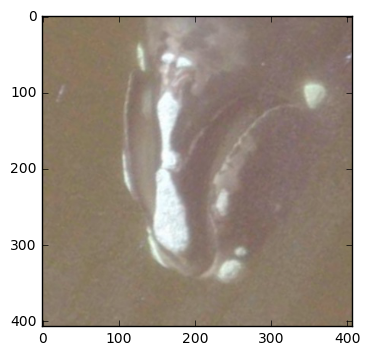

In [70]:
plt.imshow(im)

In [72]:
% cd $input_dir

/home/ubuntu/courses/deeplearning1/nbs/data/crops_for_rot/wrap


In [73]:
os.listdir('valid')[1]

'whale_39689'

In [74]:
cd valid/whale_39689

/home/ubuntu/courses/deeplearning1/nbs/data/crops_for_rot/wrap/valid/whale_39689


In [75]:
im = cv2.imread(glob('*.jpg')[0])

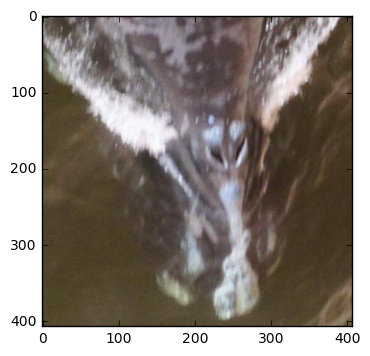

In [76]:
plt.imshow(im)

In [38]:
model.save_weights('crop_class_5.61.h5')

In [39]:
model.optimizer.lr = 0.0001

In [40]:
model.fit(tr_data, tr_c, validation_data=(val_data, val_c), shuffle=True, nb_epoch=3)

Train on 3864 samples, validate on 680 samples
Epoch 1/3
3864/3864 [==============================] - 10s - loss: 0.0132 - acc: 1.0000 - val_loss: 5.6054 - val_acc: 0.0809
Epoch 2/3
3864/3864 [==============================] - 10s - loss: 0.0086 - acc: 1.0000 - val_loss: 5.5993 - val_acc: 0.0868
Epoch 3/3
3864/3864 [==============================] - 10s - loss: 0.0066 - acc: 1.0000 - val_loss: 5.5985 - val_acc: 0.0868


In [41]:
model.save_weights('crop_class_5.59.h5')

# Make Predictions

In [42]:
test_data = load_array('test_crop_550_conv_feats.bc')

In [44]:
test_preds = model.predict(test_data)

In [45]:
test_preds.shape

(6925, 447)

In [56]:
test_b = ImageDataGenerator().flow_from_directory(input_dir+'/test', shuffle=False, batch_size=1)

Found 6925 images belonging to 1 classes.


In [57]:
test_files = test_b.filenames

In [59]:
test_files = [f.split('/')[-1] for f in test_files]

In [64]:
class_ind = load_array('tr_indices_550_crop.bc')

In [70]:
from create_whale_sub import create_sub

In [71]:
sub = create_sub(test_preds, input_dir+'/train', input_dir+'/test')

Found 3864 images belonging to 447 classes.
Found 6925 images belonging to 1 classes.


In [72]:
sub.head()

,Image,whale_00195,whale_00442,whale_02411,whale_02608,whale_02839,whale_03103,whale_03227,whale_03623,whale_03728,...,whale_98618,whale_98633,whale_98645,whale_98746,whale_98939,whale_98996,whale_99243,whale_99326,whale_99558,whale_99573
0,w_8037.jpg,0.00045050677727,0.000869674724527,0.00825662724674,0.00118368084077,0.000973085174337,0.000943258753978,0.00186946091708,0.000869923969731,0.00179296627175,...,0.000636930402834,0.00115494965576,0.000742861826438,0.00362458219752,0.00273776077665,0.00415017595515,0.00268598506227,0.00234726583585,0.000823813665193,0.00102987687569
1,w_4494.jpg,0.0014414510224,0.000386572151911,0.0037086638622,0.00491609843448,0.0012361262925,0.00106194533873,0.0039384663105,0.00146460405085,0.000998414587229,...,0.00124140433036,0.00191066693515,0.000475915789139,0.00273562828079,0.000975822738837,0.00668139336631,0.00179154681973,0.00628502946347,0.00139774719719,0.0017936239019
2,w_4673.jpg,0.00164186931215,0.00405753217638,0.000823369191494,0.00137424224522,0.00167955853976,0.00197377311997,0.00181203987449,0.00153286242858,0.00445810426027,...,0.00360396131873,0.00366715388373,0.000745384721085,0.00399981811643,0.000541688932572,0.00125695951283,0.00797817669809,0.00184187258128,0.00616874173284,0.0020067980513
3,w_8273.jpg,0.000358745164704,0.000321814382914,0.00854142196476,0.0128783313558,0.000678644399159,0.00198532803915,0.000341606908478,0.000944130180869,0.000647524720989,...,0.0007751234225,0.000696532195434,0.00151734566316,0.00276913889684,0.00297112087719,0.00658826204017,0.000890566094313,0.000389042805182,0.00123505829833,0.00124370516278
4,w_7611.jpg,0.00216307747178,0.00210913992487,0.00114769500215,0.000811097736005,0.00210286863148,0.000820437737275,0.0020252126269,0.0021647720132,0.00148711644579,...,0.000955023861025,0.00156665907707,0.000539564003702,0.00937144272029,0.000224342438742,0.00198740744963,0.00362000684254,0.000952210451942,0.00274119595997,0.0024198780302


In [73]:
sub.to_csv('sub_crops_550.csv', index=False)
from IPython.display import FileLink
FileLink('sub_crops_550.csv')

/home/ubuntu/courses/deeplearning1/nbs/whale_recognition/sub_crops_550.csv

# Conv Model With Mean

In [18]:
tr_gen = ImageDataGenerator()

In [21]:
g = tr_gen.flow_from_directory(input_dir+'/train', shuffle=False, batch_size=1)

Found 3864 images belonging to 447 classes.


In [9]:
np.squeeze?

In [25]:
m = np.array([0.,0.,0.])[np.newaxis,:]
for i in range(g.nb_sample):
    im = g.next()[0]
    m+= np.mean(im, axis=(2,3))

In [51]:
del m

In [28]:
tr_mean = m / g.nb_sample

In [29]:
tr_mean

array([[  98.4586,  107.8061,  118.2069]])

In [3]:
tr_mean = np.array([[  98.4586,  107.8061,  118.2069]])

tr_mean = array([[  98.4586,  107.8061,  118.2069]])

In [4]:
tr_mean

array([[  98.4586,  107.8061,  118.2069]])

tr_g = ImageDataGenerator(horizontal_flip=True,
                          width_shift_range=0.15, 
                          hei`ght_shift_range=0.15, 
                          zoom_range=0.1, 
                          channel_shift_range=0.15)

In [5]:
tr_b = get_tr_batches(batch_size=32)

Found 3864 images belonging to 447 classes.


In [6]:
val_b = get_val_batches()

Found 680 images belonging to 447 classes.


In [7]:
def std(x):
    return x - tr_mean.reshape((3,1,1))

### Functional Model

In [ ]:
inp = Input((3,300,300))
x = Lambda(std)(inp)
x=  ZeroPadding2D((1, 1))(x)
x=  Conv2D(64, 3,3,  activation='relu')(x)
x=    MaxPooling2D((2,2), strides=(2,2))(x)
x=    BatchNormalization()(x)
x=    ZeroPadding2D((1, 1))(x)
x=    Conv2D(64, 3,3,  activation='relu')(x)
x=    MaxPooling2D((2,2),  strides=(2,2))(x)
x=    Conv2D(447, 3,3,  activation='relu')(x)
x=    GlobalAveragePooling2D()(x)
x=    Activation('softmax')(x)
    

In [10]:
model = Model([inp], x)
model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit_generator(tr_b, 
                    tr_b.nb_sample, 
                    validation_data=val_b, 
                    nb_val_samples=val_b.nb_sample, nb_epoch=10)

Epoch 1/10
3864/3864 [==============================] - 174s - loss: 6.0969 - acc: 0.0070 - val_loss: 6.0827 - val_acc: 0.0088
Epoch 2/10
3864/3864 [==============================] - 172s - loss: 6.0811 - acc: 0.0104 - val_loss: 6.0596 - val_acc: 0.0074
Epoch 3/10
3864/3864 [==============================] - 172s - loss: 6.0662 - acc: 0.0116 - val_loss: 6.0537 - val_acc: 0.0147
Epoch 4/10
3864/3864 [==============================] - 172s - loss: 6.0591 - acc: 0.0145 - val_loss: 6.0484 - val_acc: 0.0176
Epoch 5/10
3864/3864 [==============================] - 172s - loss: 6.0477 - acc: 0.0145 - val_loss: 6.0402 - val_acc: 0.0221
Epoch 6/10
3864/3864 [==============================] - 172s - loss: 6.0430 - acc: 0.0186 - val_loss: 6.0386 - val_acc: 0.0191
Epoch 7/10
3864/3864 [==============================] - 172s - loss: 6.0337 - acc: 0.0166 - val_loss: 6.0305 - val_acc: 0.0191
Epoch 8/10
3864/3864 [==============================] - 172s - loss: 6.0242 - acc: 0.0173 - val_loss: 6.0215 - 

In [13]:
model.fit_generator(tr_b, 
                    tr_b.nb_sample, 
                    validation_data=val_b, 
                    nb_val_samples=val_b.nb_sample, nb_epoch=10)

Epoch 1/10
3864/3864 [==============================] - 173s - loss: 5.9971 - acc: 0.0220 - val_loss: 6.0029 - val_acc: 0.0162
Epoch 2/10
3864/3864 [==============================] - 174s - loss: 5.9775 - acc: 0.0246 - val_loss: 5.9780 - val_acc: 0.0221
Epoch 3/10
3864/3864 [==============================] - 172s - loss: 5.9644 - acc: 0.0217 - val_loss: 5.9733 - val_acc: 0.0250
Epoch 4/10
3864/3864 [==============================] - 172s - loss: 5.9469 - acc: 0.0248 - val_loss: 5.9712 - val_acc: 0.0250
Epoch 5/10
3864/3864 [==============================] - 172s - loss: 5.9338 - acc: 0.0259 - val_loss: 5.9740 - val_acc: 0.0221
Epoch 6/10
3864/3864 [==============================] - 172s - loss: 5.9132 - acc: 0.0264 - val_loss: 5.9505 - val_acc: 0.0324
Epoch 7/10
3864/3864 [==============================] - 172s - loss: 5.9043 - acc: 0.0269 - val_loss: 5.9512 - val_acc: 0.0206
Epoch 8/10
3864/3864 [==============================] - 172s - loss: 5.8785 - acc: 0.0285 - val_loss: 5.9261 - 

In [16]:
model.save_weights('func_5.81_.h5')

In [17]:
l = model.layers

In [20]:
K.learning_phase?

In [24]:
import scipy

def get_cm(imp, label):
    conv = conv_fn([inp,0])[0, label]
    return scipy.misc.imresize(conv, (300,300), interp='nearest')


In [25]:
tr_gen = ImageDataGenerator()

In [31]:
g = tr_gen.flow_from_directory(input_dir+'/train', shuffle=False, batch_size=1, target_size=target_size)

Found 3864 images belonging to 447 classes.


In [32]:
im = g.next()

In [33]:
im[0]

array([[[[   9.,   60.,   61., ...,   65.,   62.,   35.],
         [  36.,   65.,   62., ...,   65.,   68.,   62.],
         [  61.,   67.,   63., ...,   68.,   64.,   68.],
         ..., 
         [  58.,   60.,   62., ...,   83.,   77.,   77.],
         [  60.,   61.,   59., ...,   84.,   81.,   79.],
         [  58.,   61.,   62., ...,   83.,   79.,   77.]],

        [[  42.,   94.,   95., ...,   81.,   77.,   50.],
         [  70.,   99.,   96., ...,   80.,   83.,   77.],
         [  95.,  101.,   97., ...,   83.,   79.,   83.],
         ..., 
         [  91.,   93.,   95., ...,  105.,  102.,  102.],
         [  93.,   94.,   94., ...,  106.,  103.,  101.],
         [  91.,   94.,   97., ...,  104.,  101.,   99.]],

        [[  51.,  103.,  104., ...,   97.,   96.,   69.],
         [  79.,  108.,  105., ...,   99.,  102.,   96.],
         [ 104.,  110.,  106., ...,  102.,   98.,  102.],
         ..., 
         [ 108.,  110.,  112., ...,  126.,  122.,  122.],
         [ 112.,  113.,

In [35]:
inp = im[0]
#np.round(model.predict(inp)[0],2)



In [41]:
conv_fn = K.function([l[0].input, K.learning_phase()], l[-3].output)

In [42]:
def get_cm2(inp, label):
    conv = conv_fn([inp,0])[0, label]
    return scipy.misc.imresize(conv, (300,300))

In [43]:
cm = get_cm2(inp, 0)

In [44]:
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

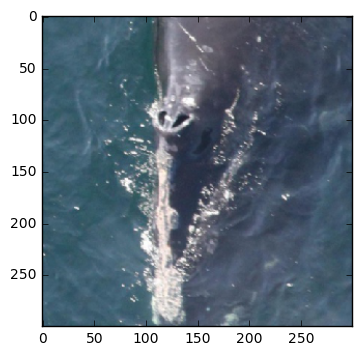

In [50]:
plt.imshow(to_plot(np.squeeze(inp)))

In [47]:
inp.shape

(1, 3, 300, 300)

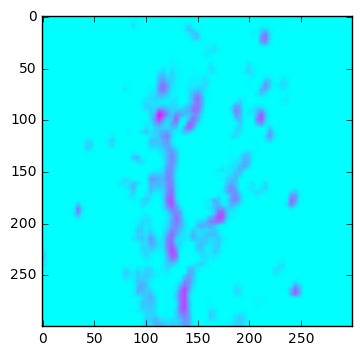

In [45]:
plt.imshow(cm, cmap="cool")

In [ ]:
plt.imshow(to_plot(val[0]))

cm = get_cm(inp, 0)

#The heatmap shows that (at very low resolution) the model is finding the fish!

plt.imshow(cm, cmap="cool")

In [21]:
g = tr_gen.flow_from_directory(input_dir+'/train', shuffle=False, batch_size=1)

Found 3864 images belonging to 447 classes.


In [51]:
model.fit_generator(tr_b, 
                    tr_b.nb_sample, 
                    validation_data=val_b, 
                    nb_val_samples=val_b.nb_sample, nb_epoch=15)

Epoch 1/15
3864/3864 [==============================] - 176s - loss: 5.7912 - acc: 0.0435 - val_loss: 5.8609 - val_acc: 0.0338
Epoch 2/15
3864/3864 [==============================] - 172s - loss: 5.7560 - acc: 0.0471 - val_loss: 5.8531 - val_acc: 0.0324
Epoch 3/15
3864/3864 [==============================] - 172s - loss: 5.7517 - acc: 0.0445 - val_loss: 5.8357 - val_acc: 0.0338
Epoch 4/15
3864/3864 [==============================] - 173s - loss: 5.7120 - acc: 0.0440 - val_loss: 5.8420 - val_acc: 0.0353
Epoch 5/15
3864/3864 [==============================] - 172s - loss: 5.7106 - acc: 0.0481 - val_loss: 5.8404 - val_acc: 0.0353
Epoch 6/15
3864/3864 [==============================] - 173s - loss: 5.6416 - acc: 0.0580 - val_loss: 5.8383 - val_acc: 0.0382
Epoch 7/15
3864/3864 [==============================] - 172s - loss: 5.6586 - acc: 0.0502 - val_loss: 5.7817 - val_acc: 0.0485
Epoch 8/15
3864/3864 [==============================] - 172s - loss: 5.6151 - acc: 0.0556 - val_loss: 5.7532 - 

In [52]:
model.fit_generator(tr_b, 
                    tr_b.nb_sample, 
                    validation_data=val_b, 
                    nb_val_samples=val_b.nb_sample, nb_epoch=10)

Epoch 1/10
3864/3864 [==============================] - 173s - loss: 5.3417 - acc: 0.0864 - val_loss: 5.7154 - val_acc: 0.0588
Epoch 2/10
3864/3864 [==============================] - 173s - loss: 5.3016 - acc: 0.0844 - val_loss: 5.7189 - val_acc: 0.0500
Epoch 3/10
3864/3864 [==============================] - 173s - loss: 5.2659 - acc: 0.0939 - val_loss: 5.7343 - val_acc: 0.0544
Epoch 4/10
1728/3864 [============>.................] - ETA: 88s - loss: 5.3047 - acc: 0.0920

KeyboardInterrupt: 

In [53]:
model.save_weights('func_5.30_tr_.h5')

In [54]:
im = g.next()

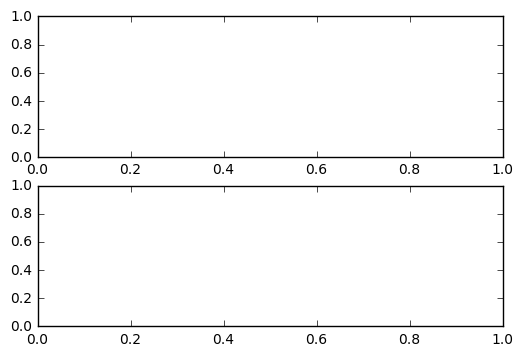

In [87]:
def plot_hm(im):
    fig, (ax1,ax2) = plt.subplots(2,1, figsize=(10,10))
    label = np.argmax(im[1])
    inp = im[0]
    cm = get_cm2(inp, label)
    ax1.imshow(cm)
    ax2.imshow(to_plot(np.squeeze(inp)))

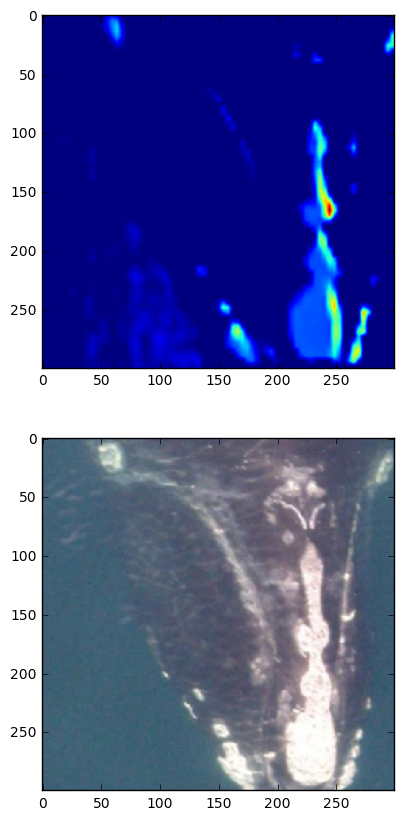

In [109]:
plot_hm(g.next())

It looks like it is learning things about the water instead of the about the whale.
So what could you do.... maybe crop directly to the blowhole and points. Omitting as much of the water as possible?



### Sequential Model

In [ ]:
def getm(): 
    return Sequential([
        Lambda(std, input_shape = (3, 300, 300)),
        ZeroPadding2D((1, 1)),
        Conv2D(64, 3,3,  activation='relu'),
        MaxPooling2D((2,2), strides=(2,2)),
        Dropout(0.),
        BatchNormalization(),
        ZeroPadding2D((1, 1)),
        Conv2D(64, 3,3,  activation='relu'),
        MaxPooling2D((2,2),  strides=(2,2)),
        Conv2D(447, 3,3,  activation='relu'),
        GlobalAveragePooling2D(),
        Activation('softmax')
        
    ])

In [22]:
m = getm()

th


In [23]:
m.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
m.fit_generator(tr_b, 
                    tr_b.nb_sample, 
                    validation_data=val_b, 
                    nb_val_samples=val_b.nb_sample, nb_epoch=10)

Epoch 1/10
3864/3864 [==============================] - 171s - loss: 6.0823 - acc: 0.0101 - val_loss: 6.0640 - val_acc: 0.0088
Epoch 2/10
3864/3864 [==============================] - 169s - loss: 6.0643 - acc: 0.0132 - val_loss: 6.0634 - val_acc: 0.0074
Epoch 3/10
2912/3864 [=====================>........] - ETA: 38s - loss: 6.0499 - acc: 0.0144

KeyboardInterrupt: 

In [25]:
m.save_weights('for_viz_6.0634_.h5')

In [30]:
m.save_weights('only_conv_6.05.h5')